In [2]:
import pandas as pd
import numpy as np 
from clustering_func import * 
from recommendation_func import * 

In [3]:
pd.set_option('display.float_format', lambda x: '%.5f' % x)

In [3]:
tracks_df = pd.read_csv("tracks_2000.csv",index_col=[0])

In [4]:
normalized_tracks_df_withIndex = preprocess(tracks_df)

In [5]:
normalized_tracks_df_withIndex.head()

,title,artist,bpm,energy,danceability,dB,liveness,valence,duration,acousticness,speechiness,popularity
0,flowers,miley cyrus,0.38411,0.65957,0.66250,0.77778,0.01220,0.65591,0.14834,0.06122,0.08929,1.00000
1,cupid - twin ver.,fifty fifty,0.39735,0.56383,0.75000,0.55556,0.40244,0.74194,0.10297,0.44898,0.01786,0.98925
2,beso,rosalía,0.23179,0.61702,0.73750,0.61111,0.18293,0.52688,0.13962,0.75510,0.21429,0.97849
3,boy's a liar pt. 2,pinkpantheress,0.48344,0.79787,0.65000,0.55556,0.28049,0.88172,0.02792,0.25510,0.05357,0.97849
4,creepin' (with the weeknd & 21 savage),metro boomin,0.25166,0.59574,0.67500,0.66667,0.07317,0.13978,0.18674,0.42857,0.05357,0.97849


In [6]:
clustering_df = normalized_tracks_df_withIndex.loc[:,"bpm":"popularity"]

In [7]:
clustering_df.head()

,bpm,energy,danceability,dB,liveness,valence,duration,acousticness,speechiness,popularity
0,0.38411,0.65957,0.66250,0.77778,0.01220,0.65591,0.14834,0.06122,0.08929,1.00000
1,0.39735,0.56383,0.75000,0.55556,0.40244,0.74194,0.10297,0.44898,0.01786,0.98925
2,0.23179,0.61702,0.73750,0.61111,0.18293,0.52688,0.13962,0.75510,0.21429,0.97849
3,0.48344,0.79787,0.65000,0.55556,0.28049,0.88172,0.02792,0.25510,0.05357,0.97849
4,0.25166,0.59574,0.67500,0.66667,0.07317,0.13978,0.18674,0.42857,0.05357,0.97849


In [10]:
search_best_n_kmean_cluster(clustering_df, 5, 10)

best_n_cluster: 5, silhouette:0.16533693538695032


5

In [11]:
kmean_summary, kmean_pred_labels=run_kmean(clustering_df,5)

 Count by cluster
1    722
3    553
2    386
4    257
0    201
Name: pred_clustering, dtype: int64
 Average values by variables and cluster
                    bpm  energy  danceability       dB  liveness  valence  \
pred_clustering                                                             
0               0.36005 0.41468        0.52083 0.53648   0.15508  0.34061   
1               0.37251 0.75332        0.69032 0.72461   0.19597  0.77357   
2               0.58710 0.76596        0.44262 0.72165   0.20390  0.42668   
3               0.30497 0.61614        0.63085 0.65843   0.18480  0.35095   
4               0.38107 0.67237        0.68375 0.65997   0.21410  0.61018   

                 duration  acousticness  speechiness   popularity  
pred_clustering                                                    
0                 0.19223       0.66103       0.09275     0.76264  
1                 0.18238       0.10269       0.09067     0.71362  
2                 0.19531       0.07500       0.

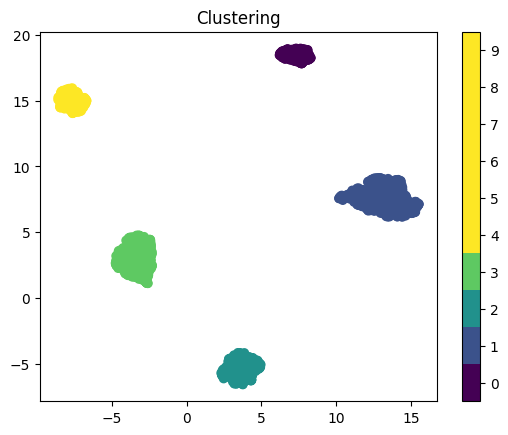

In [12]:
clustering_visualisation(clustering_df, kmean_pred_labels, "Clustering",UMAP)

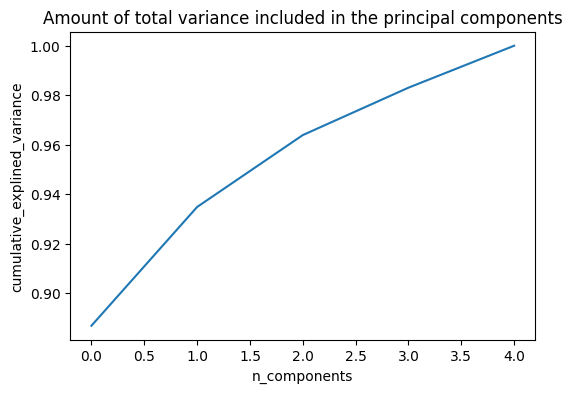

In [13]:
search_best_pca_n_components (clustering_df, 5)

In [14]:
pca_df=run_pca(clustering_df,1)

In [15]:
best_n_cluster=search_best_n_kmean_cluster(pca_df, 5, 10)

best_n_cluster: 5, silhouette:0.9849553034305443


In [16]:
kmean_pca_summmary, kmean_pca_pred_labels=run_kmean(pca_df,5)

 Count by cluster
1    722
0    553
3    386
2    257
4    201
Name: pred_clustering, dtype: int64
 Average values by variables and cluster
                       0
pred_clustering         
0                1.02935
1               -0.97828
2                2.03950
3                0.03304
4               -1.98914


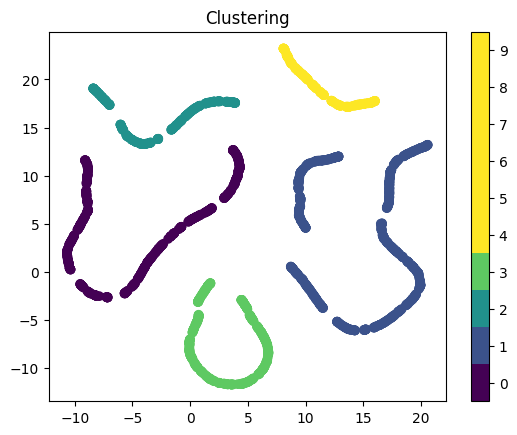

In [17]:
clustering_visualisation(pca_df, kmean_pca_pred_labels, "Clustering",UMAP)

In [18]:
clustering_df["kmean_pred_labels"] = kmean_pred_labels
clustering_df["kmean_pca_pred_labels"] = kmean_pca_pred_labels

In [19]:
clustering_df.groupby(["kmean_pred_labels","kmean_pca_pred_labels"]).size()

kmean_pred_labels  kmean_pca_pred_labels
0                  4                        201
1                  1                        722
2                  3                        386
3                  0                        553
4                  2                        257
dtype: int64

In [20]:
key_col = ['title', 'artist']
clustering_title_df = pd.concat([normalized_tracks_df_withIndex[key_col],clustering_df], axis=1)
clustering_title_df.head()

,title,artist,bpm,energy,danceability,dB,liveness,valence,duration,acousticness,speechiness,popularity,pred_clustering,kmean_pred_labels,kmean_pca_pred_labels
0,flowers,miley cyrus,0.38411,0.65957,0.66250,0.77778,0.01220,0.65591,0.14834,0.06122,0.08929,1.00000,1,1,1
1,cupid - twin ver.,fifty fifty,0.39735,0.56383,0.75000,0.55556,0.40244,0.74194,0.10297,0.44898,0.01786,0.98925,1,1,1
2,beso,rosalía,0.23179,0.61702,0.73750,0.61111,0.18293,0.52688,0.13962,0.75510,0.21429,0.97849,0,0,4
3,boy's a liar pt. 2,pinkpantheress,0.48344,0.79787,0.65000,0.55556,0.28049,0.88172,0.02792,0.25510,0.05357,0.97849,1,1,1
4,creepin' (with the weeknd & 21 savage),metro boomin,0.25166,0.59574,0.67500,0.66667,0.07317,0.13978,0.18674,0.42857,0.05357,0.97849,3,3,0


In [21]:
recommended_df=cluster_recommendation(clustering_title_df,"kmean_pca_pred_labels", "flowers","miley cyrus")

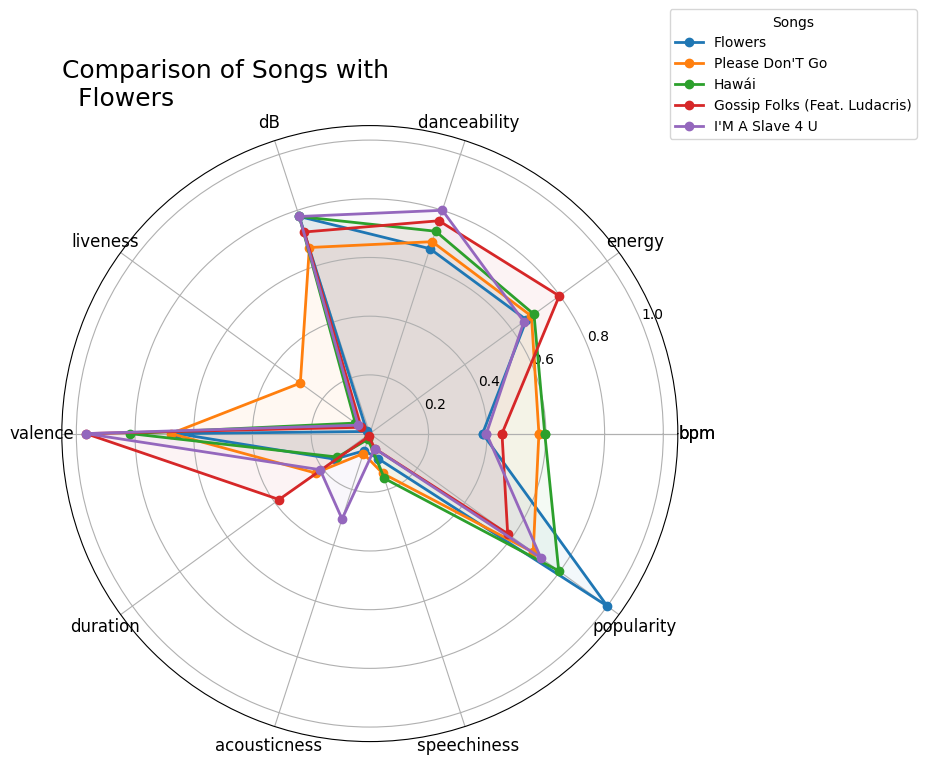

In [22]:
recommendation_visualisation(recommended_df)

Resource:

https://www.kaggle.com/datasets/conorvaneden/best-songs-on-spotify-for-every-year-2000-2023

https://www.kaggle.com/datasets/lehaknarnauli/spotify-datasets?select=tracks.csv

https://www.kaggle.com/code/typewind/draw-a-radar-chart-with-python-in-a-simple-way/notebook

https://everydaycodings.medium.com/anime-recommendation-system-collaborative-method-ca3e84ee41a0

https://medium.com/swlh/spotify-song-prediction-and-recommendation-system-b3bbc71398ad
